In [1]:
!dir| findstr heights_weights_gender-checkpoint.csv

11/20/2023  11:38 AM           418,121 heights_weights_gender-checkpoint.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df= pd.read_csv('heights_weights_gender-checkpoint.csv')

In [4]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
x=df['Height']
x

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [6]:
y=df['Weight']
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

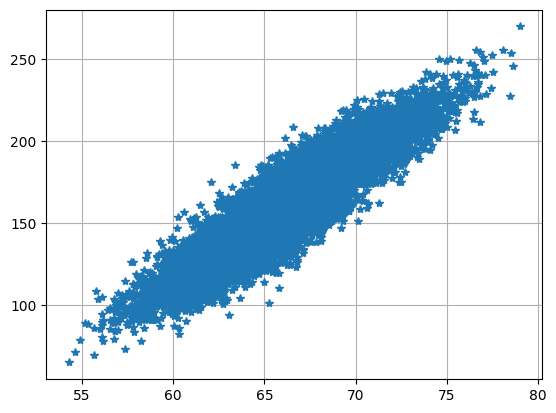

In [7]:
plt.plot(x,y,'*')
plt.grid(1)

In [8]:
# Split our dataset in train & test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=18, 
    stratify = df.Gender
)

In [9]:
len(Xtrain)+len(Xtest)==len(df)

True

In [10]:
Ytrain.shape

(8000,)

In [11]:
#reshape
Xtrain=np.array(Xtrain).reshape(-1,1)
Xtest=np.array(Xtest).reshape(-1,1)

In [12]:
Xtrain.shape

(8000, 1)

In [13]:
model=LinearRegression()
model.fit(Xtrain,Ytrain)

LinearRegression()

In [14]:
testpred1=model.predict(Xtest)

In [15]:
print(r2_score(Ytest,testpred1)*100)

86.03991405176866


In [16]:
model=RandomForestRegressor()
model.fit(Xtrain,Ytrain)

RandomForestRegressor()

In [17]:
testpred=model.predict(Xtest)

In [18]:
print(r2_score(Ytest,testpred)*100)

79.0471733514999


In [19]:
model=KNeighborsRegressor()
model.fit(Xtrain,Ytrain)

KNeighborsRegressor()

In [20]:
testpred=model.predict(Xtest)

In [21]:
print(r2_score(Ytest,testpred)*100)

82.88147800516627


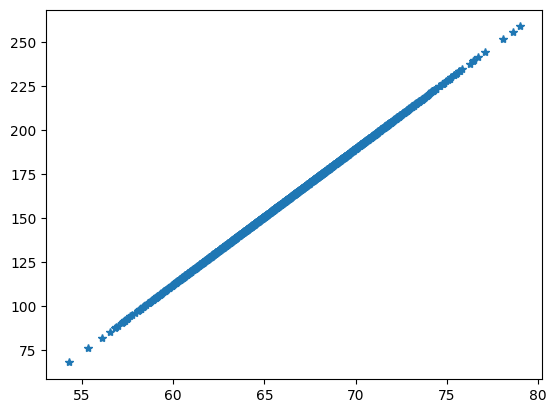

In [22]:
plt.plot(Xtest,testpred1,'*')

In [23]:
model2_results = pd.DataFrame({'Actual': Ytest, 'Predicted': testpred1})
print(model2_results.head())

          Actual   Predicted
9720  125.635115  130.788515
5215  116.733315  133.991448
5766  117.287234  128.852831
1506  249.565628  233.537929
6119  108.136639  126.835823


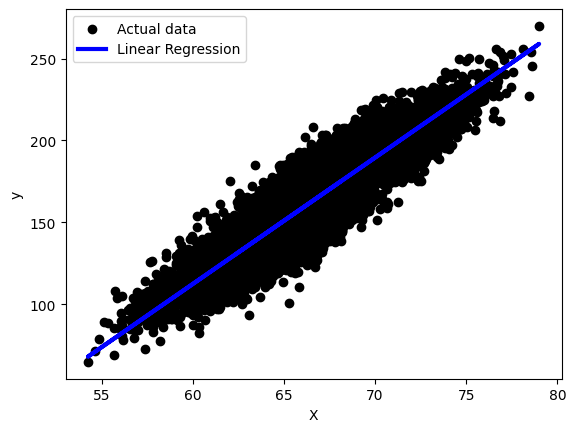

In [24]:
# Plot the results
plt.scatter(x, y, color='black', label='Actual data')
plt.plot(Xtest, testpred1, color='blue', linewidth=3, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [25]:
test_rmse = np.sqrt(mean_squared_error(Ytest, testpred1))

In [26]:
test_rmse

12.023145808689174

In [27]:
mse=mean_squared_error(Ytest, testpred1)
mse

144.55603513700004

In [28]:
root=np.sqrt(mse)
root

12.023145808689174